In [1]:
import numpy as np
from time import time
import scipy as sc
import matplotlib.pyplot as plt
import sys
import seaborn as sns
%matplotlib inline

In [2]:
sys.path.append('./lib/source/')

from errors import *
from data import *
from methods import *

# Experiments with synthetic data

## 1 Fixed matrix size, fixed rank, different number of samples

In [11]:
sample_fraction_array = np.linspace(0.1, 0.9, 15)
rank = 5
dims = (500, 500)
max_iter = int(1e3)
tol = 1e-3

M = get_data('synthetic', rank, dims, noise='y')

### Soft-Impute

In [12]:
method = 'SoftImpute'
RMSE_si_array = []
time_si_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_si = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_si_array.append(RMSE(X_si, M))
    time_si_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 0.083617. Time: 0 min 7 sec.
Sample fraction: 0.16. RMSE error: 0.065788. Time: 0 min 8 sec.
Sample fraction: 0.21. RMSE error: 0.057772. Time: 0 min 9 sec.
Sample fraction: 0.27. RMSE error: 0.052812. Time: 0 min 10 sec.
Sample fraction: 0.33. RMSE error: 0.048927. Time: 0 min 11 sec.
Sample fraction: 0.39. RMSE error: 0.045795. Time: 0 min 11 sec.
Sample fraction: 0.44. RMSE error: 0.042951. Time: 0 min 11 sec.
Sample fraction: 0.50. RMSE error: 0.040068. Time: 0 min 11 sec.
Sample fraction: 0.56. RMSE error: 0.037372. Time: 0 min 14 sec.
Sample fraction: 0.61. RMSE error: 0.034618. Time: 0 min 13 sec.
Sample fraction: 0.67. RMSE error: 0.031756. Time: 0 min 13 sec.
Sample fraction: 0.73. RMSE error: 0.028610. Time: 0 min 12 sec.
Sample fraction: 0.79. RMSE error: 0.025257. Time: 0 min 12 sec.
Sample fraction: 0.84. RMSE error: 0.021532. Time: 0 min 12 sec.
Sample fraction: 0.90. RMSE error: 0.016939. Time: 0 min 12 sec.


### SVP

In [ ]:
method = 'SVP'
RMSE_svp_array = []
time_svp_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svp = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svp_array.append(RMSE(X_svp, M))
    time_svp_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

### SVT

In [ ]:
method = 'SVT'
RMSE_svt_array = []
time_svt_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svt_array.append(RMSE(X_svt, M))
    time_svt_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

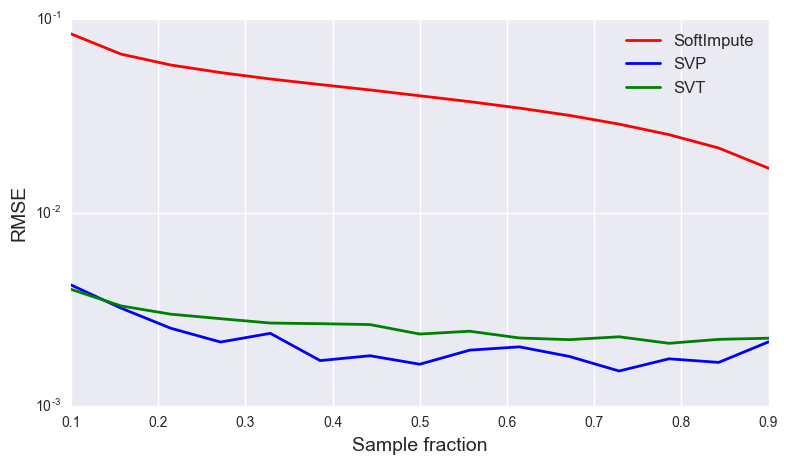

In [7]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.semilogy(sample_fraction_array, RMSE_si_array, 'r', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svp_array, 'b', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/synthetic_nsamp_rmse.png')
plt.show()

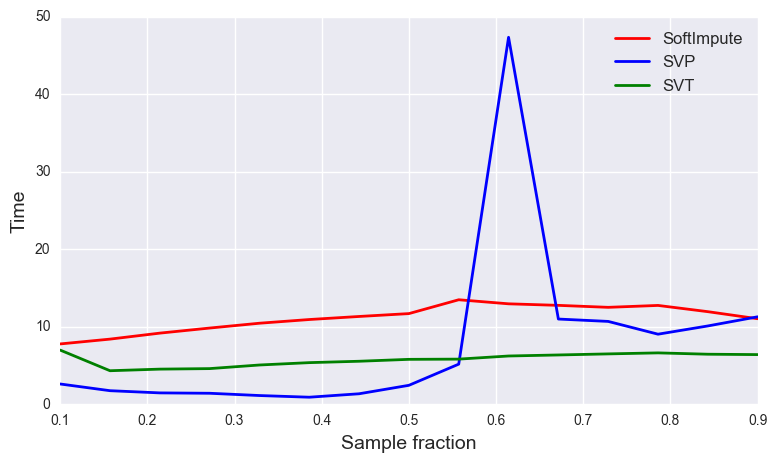

In [8]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.plot(sample_fraction_array, time_si_array, 'r', linewidth=2)
plt.plot(sample_fraction_array, time_svp_array, 'b', linewidth=2)
plt.plot(sample_fraction_array, time_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/synthetic_nsamp_time.png')
plt.show()

## 2 Fixed matrix size, fixed number of samples, different rank

In [9]:
sample_fraction = 0.2
rank_array = range(5, 56, 5)
dims = (300, 300)
max_iter = int(1e3)
tol = 1e-2

nsamp = int(sample_fraction * np.prod(dims))
omega = sampling_operator(nsamp, dims)

In [10]:
method = 'SoftImpute'
RMSE_si_array = []
time_si_array = []

for rank in rank_array:
    M = get_data('synthetic', rank, dims, noise='y')
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_si = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_si_array.append(RMSE(X_si, M))
    time_si_array.append(t1-t0)
    
    print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
    (rank, RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

Matrix rank: 5. RMSE error: 0.071205. Time: 0 min 3 sec.
Matrix rank: 10. RMSE error: 0.160192. Time: 0 min 3 sec.
Matrix rank: 15. RMSE error: 0.291708. Time: 0 min 3 sec.
Matrix rank: 20. RMSE error: 0.520754. Time: 0 min 4 sec.
Matrix rank: 25. RMSE error: 0.958278. Time: 0 min 4 sec.
Matrix rank: 30. RMSE error: 1.824995. Time: 0 min 4 sec.
Matrix rank: 35. RMSE error: 4.193790. Time: 0 min 5 sec.
Matrix rank: 40. RMSE error: 4.918552. Time: 0 min 5 sec.
Matrix rank: 45. RMSE error: 5.507517. Time: 0 min 6 sec.
Matrix rank: 50. RMSE error: 5.925321. Time: 0 min 6 sec.
Matrix rank: 55. RMSE error: 6.213063. Time: 0 min 6 sec.


In [11]:
method = 'SVP'
RMSE_svp_array = []
time_svp_array = []

for rank in rank_array:
    M = get_data('synthetic', rank, dims, noise='y')
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svp = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svp_array.append(RMSE(X_svp, M))
    time_svp_array.append(t1-t0)
    
    print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
    (rank, RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

Matrix rank: 5. RMSE error: 0.033174. Time: 0 min 0 sec.
Matrix rank: 10. RMSE error: 0.071554. Time: 0 min 0 sec.
Matrix rank: 15. RMSE error: 0.115869. Time: 0 min 0 sec.
Matrix rank: 20. RMSE error: 0.196213. Time: 0 min 1 sec.
Matrix rank: 25. RMSE error: 0.363595. Time: 0 min 4 sec.
Matrix rank: 30. RMSE error: 4.415410. Time: 0 min 27 sec.
Matrix rank: 35. RMSE error: 5.430238. Time: 0 min 13 sec.
Matrix rank: 40. RMSE error: 5.543582. Time: 0 min 5 sec.
Matrix rank: 45. RMSE error: 5.983456. Time: 0 min 3 sec.
Matrix rank: 50. RMSE error: 6.352978. Time: 0 min 2 sec.
Matrix rank: 55. RMSE error: 6.685979. Time: 0 min 1 sec.


In [12]:
method = 'SVT'
RMSE_svt_array = []
time_svt_array = []

for rank in rank_array:
    M = get_data('synthetic', rank, dims, noise='y')
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svt_array.append(RMSE(X_svt, M))
    time_svt_array.append(t1-t0)
    
    print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
    (rank, RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

Matrix rank: 5. RMSE error: 0.034868. Time: 0 min 1 sec.
Matrix rank: 10. RMSE error: 0.256721. Time: 0 min 33 sec.
Matrix rank: 15. RMSE error: 2.220274. Time: 0 min 47 sec.
Matrix rank: 20. RMSE error: 3.520828. Time: 0 min 52 sec.
Matrix rank: 25. RMSE error: 4.343169. Time: 1 min 3 sec.
Matrix rank: 30. RMSE error: 4.965097. Time: 1 min 6 sec.
Matrix rank: 35. RMSE error: 5.420871. Time: 1 min 8 sec.
Matrix rank: 40. RMSE error: 5.610228. Time: 1 min 14 sec.
Matrix rank: 45. RMSE error: 5.861214. Time: 1 min 21 sec.
Matrix rank: 50. RMSE error: 7.032022. Time: 1 min 26 sec.
Matrix rank: 55. RMSE error: 7.431827. Time: 1 min 10 sec.


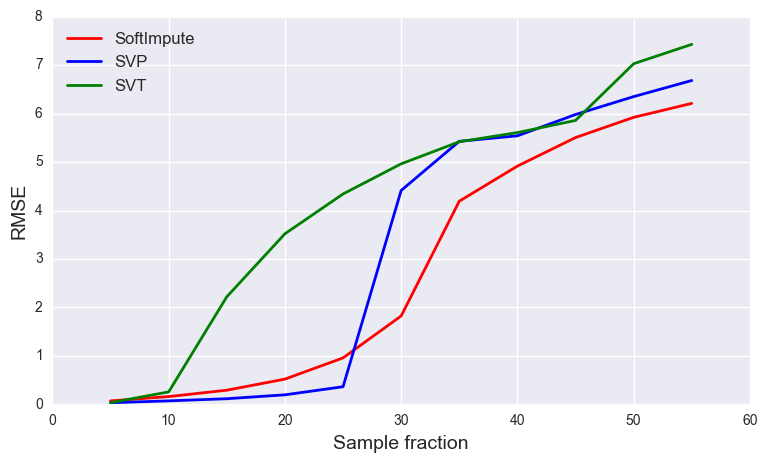

In [21]:
plt.figure(figsize=(9,5))
plt.plot(rank_array, RMSE_si_array, 'r', linewidth=2)
plt.plot(rank_array, RMSE_svp_array, 'b', linewidth=2)
plt.plot(rank_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], loc=2, fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/synthetic_rank_rmse.png')
plt.show()

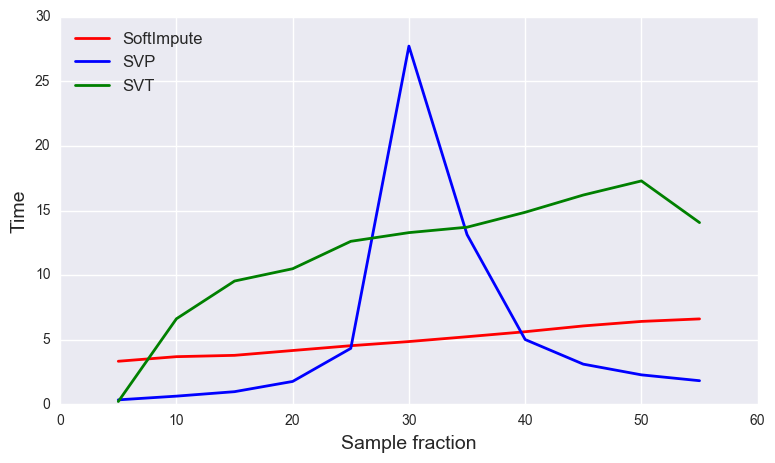

In [22]:
plt.figure(figsize=(9,5))
plt.plot(rank_array, time_si_array, 'r', linewidth=2)
plt.plot(rank_array, time_svp_array, 'b', linewidth=2)
plt.plot(rank_array, np.array(time_svt_array) / 5, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], loc=2, fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/synthetic_rank_time.png')
plt.show()

# Real data experiment

In [41]:
sample_fraction_array = np.linspace(0.1, 0.9, 9)
rank = 5
max_iter = int(1e3)
tol = 1e-3

M = get_data('real', -1, -1, row_num=1000)
max_M = np.max(M)
M /= max_M
dims = M.shape

### Soft-Impute

In [42]:
method = 'SoftImpute'
RMSE_si_array = []
time_si_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_si = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_si_array.append(RMSE(X_si, M))
    time_si_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 0.635986. Time: 0 min 3 sec.
Sample fraction: 0.20. RMSE error: 0.457628. Time: 0 min 3 sec.
Sample fraction: 0.30. RMSE error: 0.371319. Time: 0 min 4 sec.
Sample fraction: 0.40. RMSE error: 0.324954. Time: 0 min 5 sec.
Sample fraction: 0.50. RMSE error: 0.288152. Time: 0 min 5 sec.
Sample fraction: 0.60. RMSE error: 0.254758. Time: 0 min 4 sec.
Sample fraction: 0.70. RMSE error: 0.218033. Time: 0 min 4 sec.
Sample fraction: 0.80. RMSE error: 0.175776. Time: 0 min 4 sec.
Sample fraction: 0.90. RMSE error: 0.123565. Time: 0 min 3 sec.


### SVP

In [43]:
method = 'SVP'
RMSE_svp_array = []
time_svp_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svp = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svp_array.append(RMSE(X_svp, M))
    time_svp_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 0.944134. Time: 0 min 14 sec.
Sample fraction: 0.20. RMSE error: 0.626987. Time: 0 min 50 sec.
Sample fraction: 0.30. RMSE error: 0.436444. Time: 0 min 48 sec.
Sample fraction: 0.40. RMSE error: 0.395262. Time: 0 min 53 sec.
Sample fraction: 0.50. RMSE error: 0.382714. Time: 1 min 4 sec.
Sample fraction: 0.60. RMSE error: 0.378620. Time: 1 min 18 sec.
Sample fraction: 0.70. RMSE error: 0.379478. Time: 1 min 29 sec.
Sample fraction: 0.80. RMSE error: 0.381670. Time: 1 min 41 sec.
Sample fraction: 0.90. RMSE error: 0.389949. Time: 1 min 53 sec.


### SVT

In [44]:
method = 'SVT'
RMSE_svt_array = []
time_svt_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svt_array.append(RMSE(X_svt, M))
    time_svt_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 0.677726. Time: 0 min 51 sec.
Sample fraction: 0.20. RMSE error: 0.849964. Time: 1 min 2 sec.
Sample fraction: 0.30. RMSE error: 1.024559. Time: 1 min 12 sec.
Sample fraction: 0.40. RMSE error: 1.160681. Time: 1 min 25 sec.
Sample fraction: 0.50. RMSE error: 1.270217. Time: 1 min 30 sec.
Sample fraction: 0.60. RMSE error: 1.385689. Time: 1 min 43 sec.
Sample fraction: 0.70. RMSE error: 1.462583. Time: 1 min 52 sec.
Sample fraction: 0.80. RMSE error: 1.579944. Time: 2 min 6 sec.
Sample fraction: 0.90. RMSE error: 1.674532. Time: 2 min 23 sec.


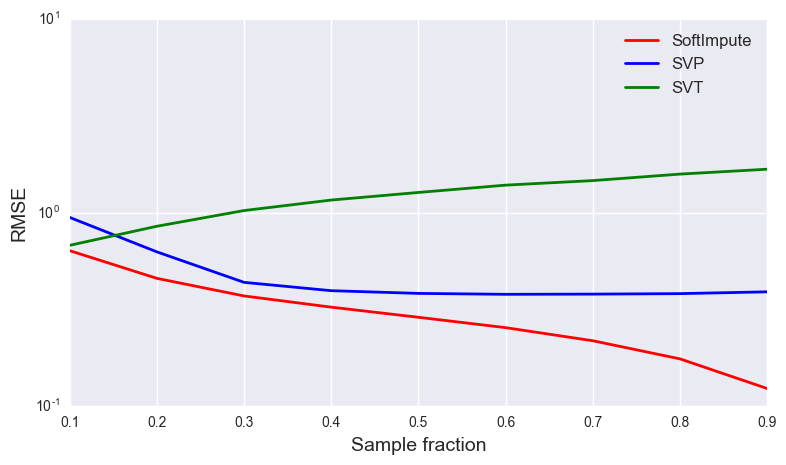

In [45]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.semilogy(sample_fraction_array, RMSE_si_array, 'r', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svp_array, 'b', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/real_nsamp_rmse.png')
plt.show()

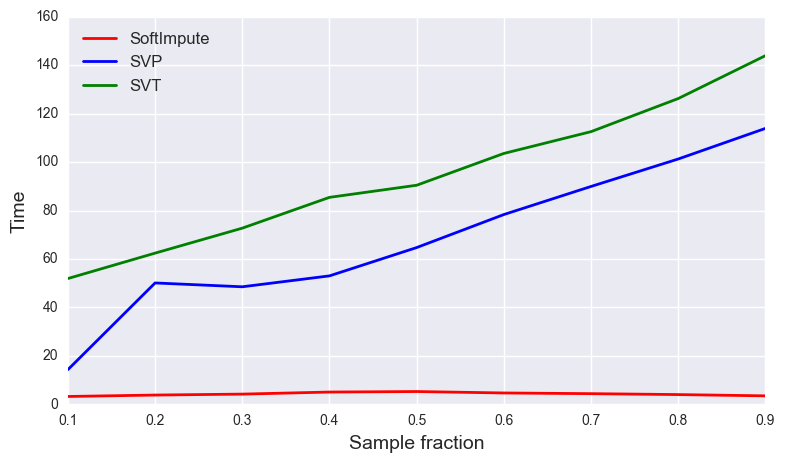

In [47]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.plot(sample_fraction_array, time_si_array, 'r', linewidth=2)
plt.plot(sample_fraction_array, time_svp_array, 'b', linewidth=2)
plt.plot(sample_fraction_array, time_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], loc=2, fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/real_nsamp_time.png')
plt.show()